# Building the CNN

## Preprocessing Dataset

In [37]:
import tensorflow as tf
import os

In [38]:
# Limits GPU space taken over by model

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [39]:
import cv2
import imghdr

In [40]:
# Sets the data directory

data_dir = 'chest_xray'

In [41]:
image_exts = ['jpeg', 'jpg', 'png']

In [42]:
# Checks if there are only pictures in the dataset with the correct file format
"""
for image_class in os.listdir(data_dir):
    print(image_class)
    for sub_class in os.listdir(os.path.join(data_dir,image_class)):
        print(sub_class)
        for image in os.listdir(os.path.join(data_dir, image_class, sub_class)):
            print(image)
            image_path = os.path.join(data_dir, image_class, sub_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
"""

"\nfor image_class in os.listdir(data_dir):\n    print(image_class)\n    for sub_class in os.listdir(os.path.join(data_dir,image_class)):\n        print(sub_class)\n        for image in os.listdir(os.path.join(data_dir, image_class, sub_class)):\n            print(image)\n            image_path = os.path.join(data_dir, image_class, sub_class, image)\n            try:\n                img = cv2.imread(image_path)\n                tip = imghdr.what(image_path)\n                if tip not in image_exts:\n                    print('Image not in ext list {}'.format(image_path))\n                    os.remove(image_path)\n            except Exception as e:\n                print('Issue with image {}'.format(image_path))\n"

### Building Keras Pipeline

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
train_data = tf.keras.utils.image_dataset_from_directory('chest_xray/train', class_names=['NORMAL', 'PNEUMONIA'])
# NORMAL: Label 0, PNEUMONIA: Label 1

val_data = tf.keras.utils.image_dataset_from_directory('chest_xray/val', class_names=['NORMAL', 'PNEUMONIA'])

test_data = tf.keras.utils.image_dataset_from_directory('chest_xray/test', class_names=['NORMAL', 'PNEUMONIA'])

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [45]:
# Normalizes all datapoints to a value between 0 and 1
train_data = train_data.map(lambda x, y: (x/255, y))
val_data = val_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

In [46]:
data_iterator_train = train_data.as_numpy_iterator()
data_iterator_val = val_data.as_numpy_iterator()
data_iterator_test = test_data.as_numpy_iterator()

In [47]:
train_batch = data_iterator_train.next()
val_batch = data_iterator_val.next()
test_batch = data_iterator_test.next()

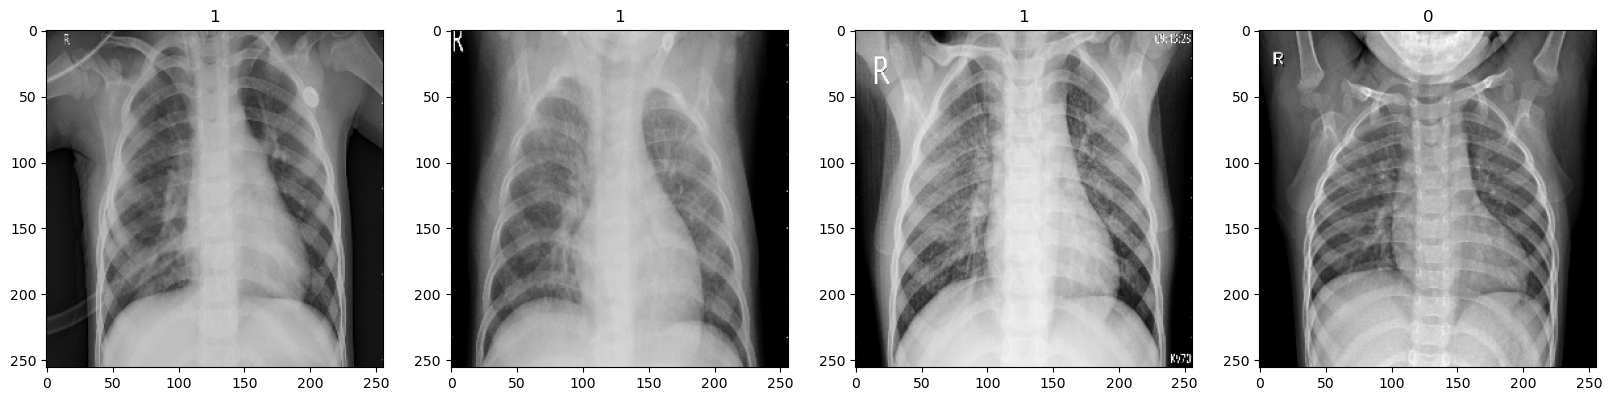

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(train_batch[1][idx])

#Labels:
#Normal = 0
#Pneumonia = 1


## Building Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile('SGD', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## Training Model

In [54]:
logdir='logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train_data, epochs=20, validation_data = val_data, callbacks=[tensorboard_callback])

Epoch 1/20
163/163 [==============================] - 100s 599ms/step - loss: 0.4888 - accuracy: 0.7730 - val_loss: 0.7841 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 93s 560ms/step - loss: 0.2861 - accuracy: 0.8827 - val_loss: 1.4456 - val_accuracy: 0.6250
Epoch 3/20
163/163 [==============================] - 91s 546ms/step - loss: 0.2056 - accuracy: 0.9189 - val_loss: 0.6281 - val_accuracy: 0.6875
Epoch 4/20
163/163 [==============================] - 94s 564ms/step - loss: 0.1573 - accuracy: 0.9394 - val_loss: 0.2939 - val_accuracy: 0.8750
Epoch 5/20
163/163 [==============================] - 92s 549ms/step - loss: 0.1422 - accuracy: 0.9446 - val_loss: 0.5098 - val_accuracy: 0.7500
Epoch 6/20
163/163 [==============================] - 92s 553ms/step - loss: 0.1330 - accuracy: 0.9496 - val_loss: 1.1491 - val_accuracy: 0.5625
Epoch 7/20
163/163 [==============================] - 93s 557ms/step - loss: 0.1228 - accuracy: 0.9528 - val_loss: 0.4372 - val_a

In [57]:
hist.history

{'loss': [0.48877307772636414,
  0.2861311137676239,
  0.20556463301181793,
  0.1572973132133484,
  0.1422099620103836,
  0.13303199410438538,
  0.12281704694032669,
  0.11513940244913101,
  0.1076129823923111,
  0.09887091815471649,
  0.09765756130218506,
  0.08940695971250534,
  0.08695262670516968,
  0.08574238419532776,
  0.0789402574300766,
  0.07495403289794922,
  0.0744454488158226,
  0.07183641940355301,
  0.06731095910072327,
  0.06462545692920685],
 'accuracy': [0.7730061411857605,
  0.8826687335968018,
  0.9189033508300781,
  0.9394171833992004,
  0.9445935487747192,
  0.9495782256126404,
  0.9528374075889587,
  0.956863522529602,
  0.9616564512252808,
  0.9618481397628784,
  0.9629984498023987,
  0.9677914381027222,
  0.9672162532806396,
  0.9693251252174377,
  0.9708588719367981,
  0.9731594920158386,
  0.9731594920158386,
  0.9748849868774414,
  0.9741181135177612,
  0.9758435487747192],
 'val_loss': [0.7840972542762756,
  1.445616364479065,
  0.6280550360679626,
  0.2938

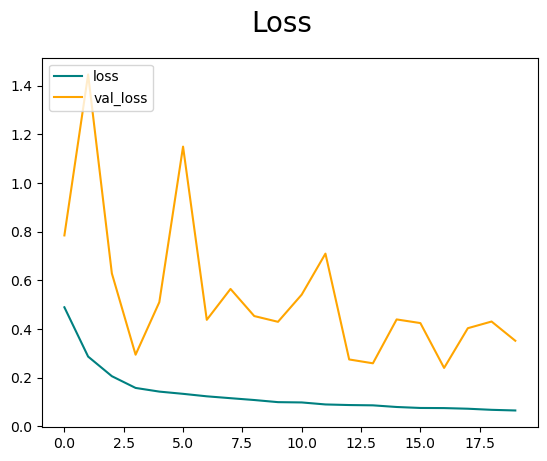

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Testing Model

In [59]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [60]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [61]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 222ms/step


In [63]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.7375478744506836, Recall:0.9871794581413269, Accuracy:0.7724359035491943
